In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True, rc={'figure.figsize':(11,8)}, font_scale=2)

from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.datasets import make_blobs
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [2]:
_DATA_DIR = '/classes/2080001_spr2022/Data/'

# Toy example

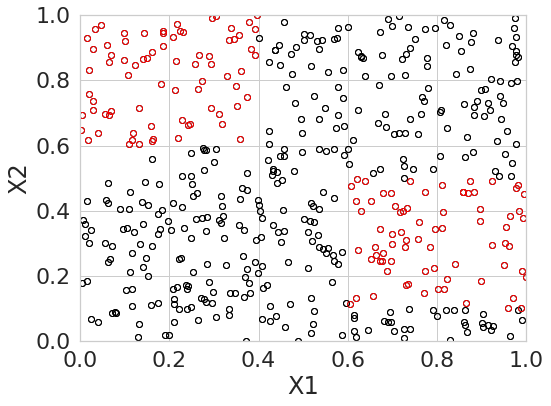

In [3]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import cm
N = 500
np.random.seed(0)
Xg =  np.random.uniform(low=[0,0], high=[1,1], size=(N,2))
y = np.zeros(N)
for i in range(N):
    if (Xg[i][0]<0.4 and Xg[i][1]>0.6) or (Xg[i][0]>0.6 and Xg[i][1]>0.1 and  Xg[i][1]<0.5):
        y[i] = 1
edgecolor=['black','red']
plt.figure(figsize = (8,6))
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel("X1")
plt.ylabel("X2")
plt.plot(Xg[:,0],Xg[:,1],'o',markerfacecolor="none", markeredgecolor='black',markersize=6)
for i in range(2):
        plt.plot(Xg[y==i,0],Xg[y==i,1],'o',markerfacecolor="none", markeredgecolor=edgecolor[i],markersize=6)  

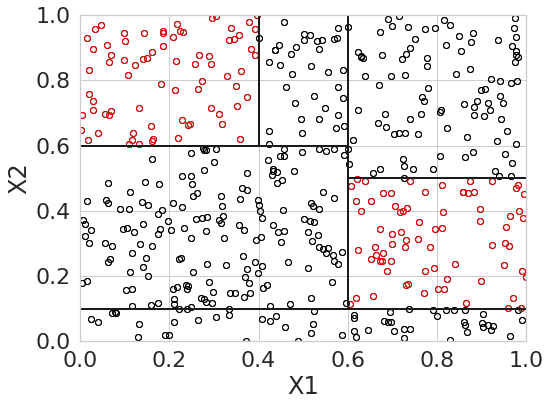

In [4]:
plt.figure(figsize = (8,6))
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel("X1")
plt.ylabel("X2")
plt.plot(Xg[:,0],Xg[:,1],'o',markerfacecolor="none", markeredgecolor='black',markersize=6)
for i in range(2):
        plt.plot(Xg[y==i,0],Xg[y==i,1],'o',markerfacecolor="none", markeredgecolor=edgecolor[i],markersize=6)  
plt.axhline(y=0.1, color='k', linestyle='-', linewidth=2)  
plt.axvline(x = 0.6,ymin=0.1, color='k', linestyle='-', linewidth=2) 
plt.axhline(y=0.5, xmin=0.6,color='k', linestyle='-', linewidth=2) 
plt.axhline(y=0.6, xmax=0.6,color='k', linestyle='-', linewidth=2) 
plt.axvline(x = 0.4,ymin=0.6, color='k', linestyle='-', linewidth=2) 

<Figure size 792x576 with 0 Axes>

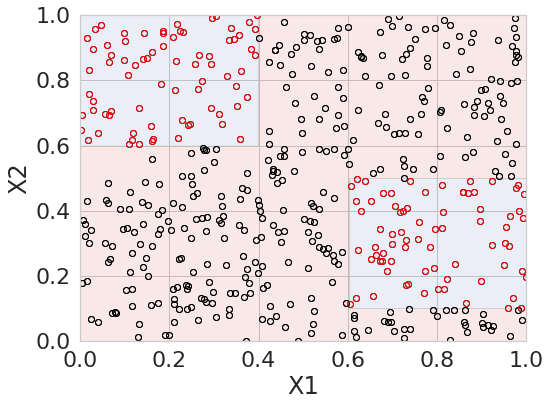

In [5]:
clf = DecisionTreeClassifier().fit(Xg, y)
plot_step = 0.001
xx, yy = np.meshgrid(np.arange(0, 1, plot_step), np.arange(0, 1, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize = (8,6))
plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim((0,1))
plt.ylim((0,1))
cs = plt.contourf(xx, yy, Z,cmap=plt.cm.RdYlBu, alpha=0.1)
plt.plot(Xg[:,0],Xg[:,1],'o',markerfacecolor="none", markeredgecolor='black',markersize=6)
for i in range(2):
        plt.plot(Xg[y==i,0],Xg[y==i,1],'o',markerfacecolor="none", markeredgecolor=edgecolor[i],markersize=6)  



In [6]:
print(tree.export_text(clf))

|--- feature_1 <= 0.10
|   |--- class: 0.0
|--- feature_1 >  0.10
|   |--- feature_0 <= 0.60
|   |   |--- feature_1 <= 0.60
|   |   |   |--- class: 0.0
|   |   |--- feature_1 >  0.60
|   |   |   |--- feature_0 <= 0.40
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_0 >  0.40
|   |   |   |   |--- class: 0.0
|   |--- feature_0 >  0.60
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 0.0



[Text(230.175, 391.392, 'X[1] <= 0.101\ngini = 0.418\nsamples = 500\nvalue = [351, 149]'),
 Text(153.45000000000002, 304.416, 'gini = 0.0\nsamples = 58\nvalue = [58, 0]'),
 Text(306.90000000000003, 304.416, 'X[0] <= 0.604\ngini = 0.447\nsamples = 442\nvalue = [293, 149]'),
 Text(153.45000000000002, 217.44, 'X[1] <= 0.598\ngini = 0.396\nsamples = 276\nvalue = [201, 75]'),
 Text(76.72500000000001, 130.464, 'gini = 0.0\nsamples = 164\nvalue = [164, 0]'),
 Text(230.175, 130.464, 'X[0] <= 0.399\ngini = 0.442\nsamples = 112\nvalue = [37, 75]'),
 Text(153.45000000000002, 43.488, 'gini = 0.0\nsamples = 75\nvalue = [0, 75]'),
 Text(306.90000000000003, 43.488, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(460.35, 217.44, 'X[1] <= 0.5\ngini = 0.494\nsamples = 166\nvalue = [92, 74]'),
 Text(383.62500000000006, 130.464, 'gini = 0.0\nsamples = 74\nvalue = [0, 74]'),
 Text(537.075, 130.464, 'gini = 0.0\nsamples = 92\nvalue = [92, 0]')]

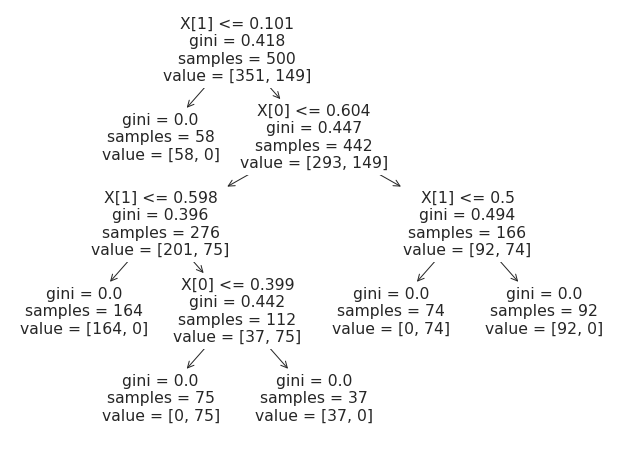

In [7]:
plot_tree(clf)

# NBC

In [8]:
nbc = pd.read_csv(_DATA_DIR+'nbc_showdetails.csv')
demos = pd.read_csv(_DATA_DIR+"nbc_demographics.csv")

In [9]:
X = demos.iloc[:,1:]
y = nbc.Genre
clf = tree.DecisionTreeClassifier(random_state = 0).fit(X, y)

In [10]:
print(tree.export_text(clf,feature_names=list(X.columns)))


|--- WIRED.CABLE.W.O.PAY <= 28.67
|   |--- VCR.OWNER <= 83.75
|   |   |--- TERRITORY.PACIFIC <= 18.87
|   |   |   |--- class: Situation Comedy
|   |   |--- TERRITORY.PACIFIC >  18.87
|   |   |   |--- class: Reality
|   |--- VCR.OWNER >  83.75
|   |   |--- X2.PERSONS <= 28.80
|   |   |   |--- class: Drama/Adventure
|   |   |--- X2.PERSONS >  28.80
|   |   |   |--- class: Situation Comedy
|--- WIRED.CABLE.W.O.PAY >  28.67
|   |--- BLACK <= 17.20
|   |   |--- class: Reality
|   |--- BLACK >  17.20
|   |   |--- class: Drama/Adventure



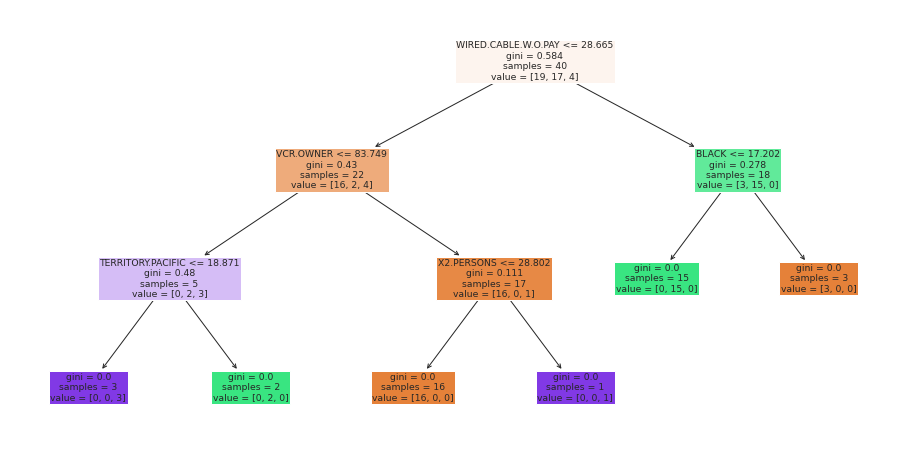

In [11]:
# tree
plt.figure(figsize = (16,8))
plot_tree(clf, filled=True,feature_names=list(X.columns))
plt.show()
#plt.savefig('nbc.pdf')

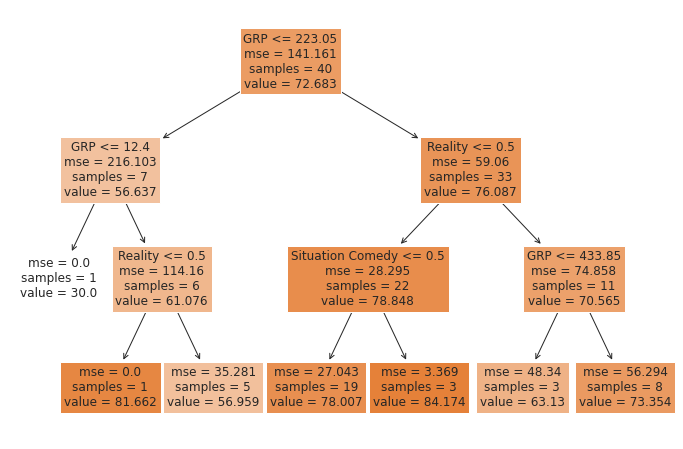

In [12]:
X = pd.concat([nbc.GRP,pd.get_dummies(nbc.Genre)], axis=1)

y = nbc.PE

clf = tree.DecisionTreeRegressor(max_depth = 3).fit(X, y)

plt.figure(figsize = (12,8))

#text_representation = tree.export_text(clf,feature_names=list(X.columns))

# tree
plot_tree(clf, filled=True,feature_names=list(X.columns),fontsize =12)
#plt.show()

# prediction
reality = pd.concat([X.GRP,pd.DataFrame(np.tile(np.array([0,0,1]), (len(nbc), 1)))], axis=1)
pred = pd.DataFrame(clf.predict(reality))
reality_pred = pd.concat([X.GRP,pred], axis=1).sort_values(['GRP'], ascending=True).reset_index(drop=True)
reality_pred.columns = ['GRP','pred']

comedy = pd.concat([X.GRP,pd.DataFrame(np.tile(np.array([0,1,0]), (len(nbc), 1)))], axis=1)
pred = pd.DataFrame(clf.predict(comedy))
comedy_pred = pd.concat([X.GRP,pred], axis=1).sort_values(['GRP'], ascending=True).reset_index(drop=True)
comedy_pred.columns = ['GRP','pred']

drama = pd.concat([X.GRP,pd.DataFrame(np.tile(np.array([1,0,0]), (len(nbc), 1)))], axis=1)
pred = pd.DataFrame(clf.predict(drama))
drama_pred = pd.concat([X.GRP,pred], axis=1).sort_values(['GRP'], ascending=True).reset_index(drop=True)
drama_pred.columns = ['GRP','pred']


plt.savefig('nbc_engagement_1.pdf')

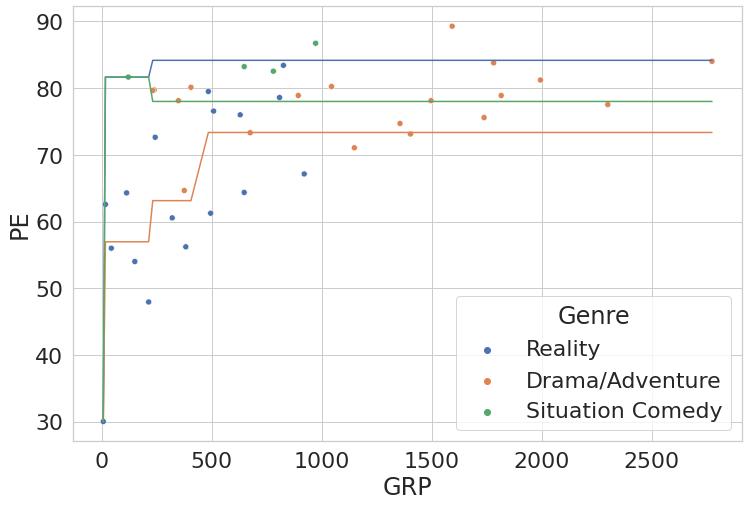

In [13]:
plt.figure(figsize = (12,8))

sns.scatterplot(x='GRP',y='PE',hue='Genre', data = nbc)
plt.plot(reality_pred.GRP,reality_pred.pred , '-')
plt.plot(comedy_pred.GRP,comedy_pred.pred , '-')
plt.plot(drama_pred.GRP,drama_pred.pred , '-')
plt.xlabel('GRP')
plt.ylabel('PE')

plt.savefig('nbc_engagement_2.pdf')

plt.show()


# Social Network Ads

In [14]:
AD = pd.read_csv(_DATA_DIR + 'Social_Network_Ads.csv')

# Change predicted value into binary numerical value 0,1
Gender_values = {'Male': 1, 'Female': 0}
AD['Gender'] = AD.Gender.map(Gender_values)

In [15]:
X = AD[['Age','EstimatedSalary','Gender']]
Y = AD.Purchased

In [16]:
clf = tree.DecisionTreeClassifier(random_state = 0).fit(X, Y)
#text_representation = tree.export_text(clf,feature_names=list(X.columns))

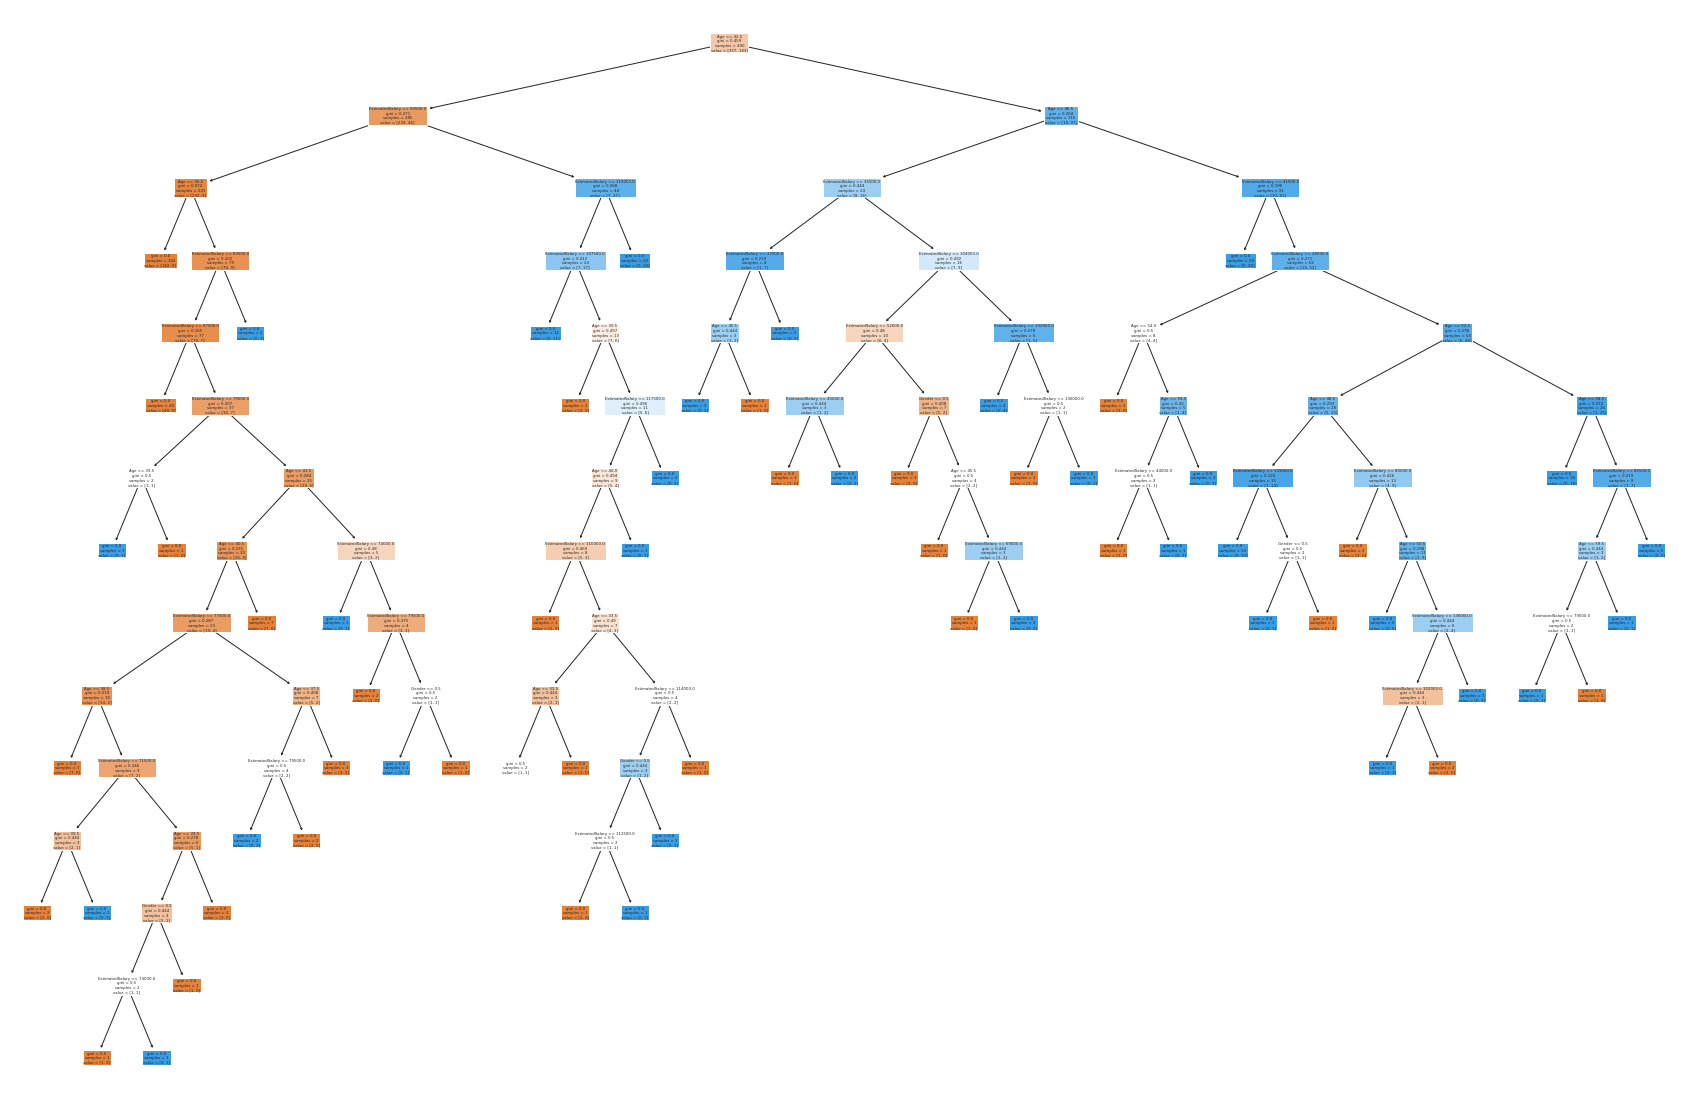

In [17]:
plt.figure(figsize = (30,20))
# tree
plot_tree(clf, filled=True,feature_names=list(X.columns))

plt.show()

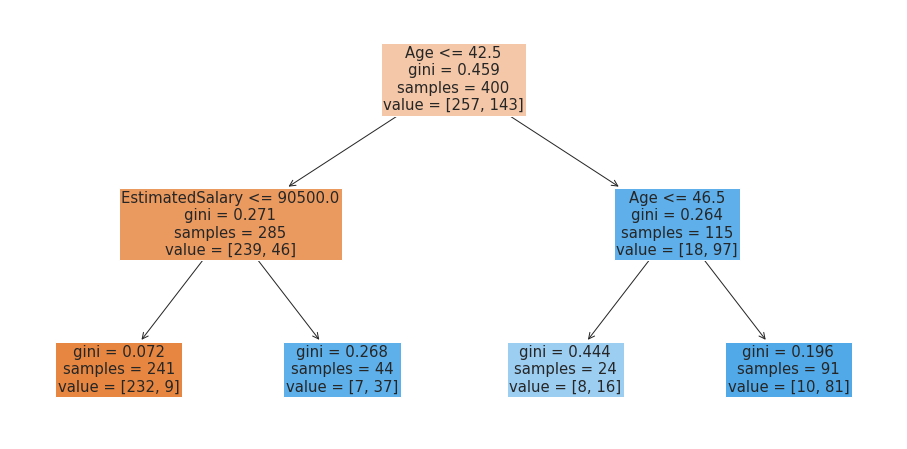

In [18]:
clf = tree.DecisionTreeClassifier(random_state = 0,max_depth=2).fit(X, Y)
text_representation = tree.export_text(clf,feature_names=list(X.columns))
plt.figure(figsize = (16,8))
# tree
plot_tree(clf, filled=True,feature_names=list(X.columns))
plt.show()

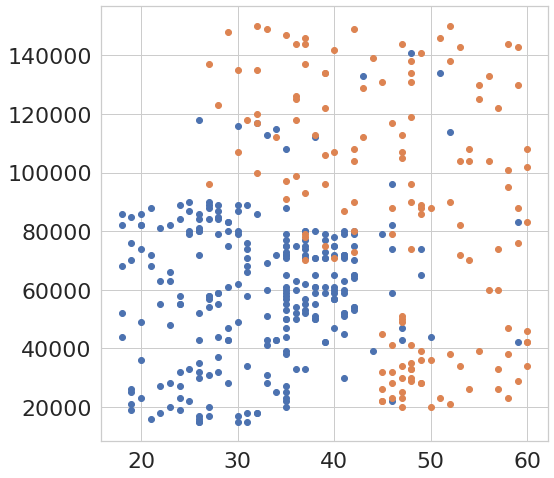

In [19]:
X = np.array(AD[['Age','EstimatedSalary']])
y = np.array(AD.Purchased)
plt.figure(figsize = (8,8))
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])

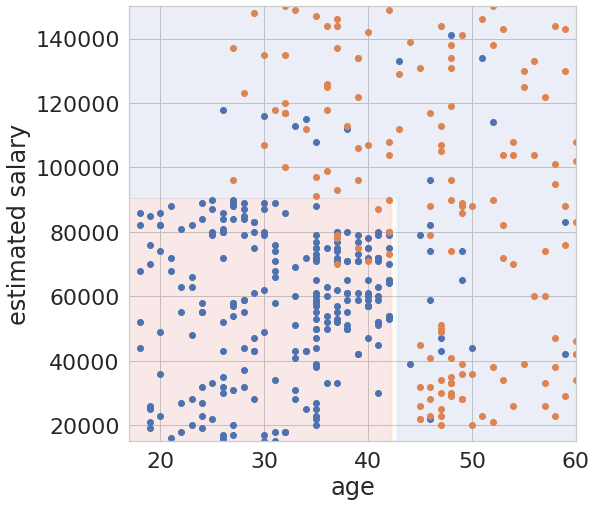

In [20]:
clf = tree.DecisionTreeClassifier(random_state = 0,max_leaf_nodes=3).fit(X, y)
# decision surfaces
plt.figure(figsize = (8,8))
plot_step = 1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max,plot_step), np.arange(y_min, y_max,plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.1)

for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])

plt.xlabel('age')
plt.ylabel('estimated salary')
plt.savefig('snads.pdf')

### Minimal cost-complexity pruning

In [21]:
np.random.seed(0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
clf = tree.DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [23]:
ccp_alphas

array([0.        , 0.00190476, 0.00205128, 0.0021256 , 0.00238619,
       0.00266667, 0.00285714, 0.00342857, 0.00384921, 0.00444444,
       0.00474503, 0.00488095, 0.00534692, 0.00581103, 0.00712753,
       0.1383975 , 0.17118495])

In [24]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

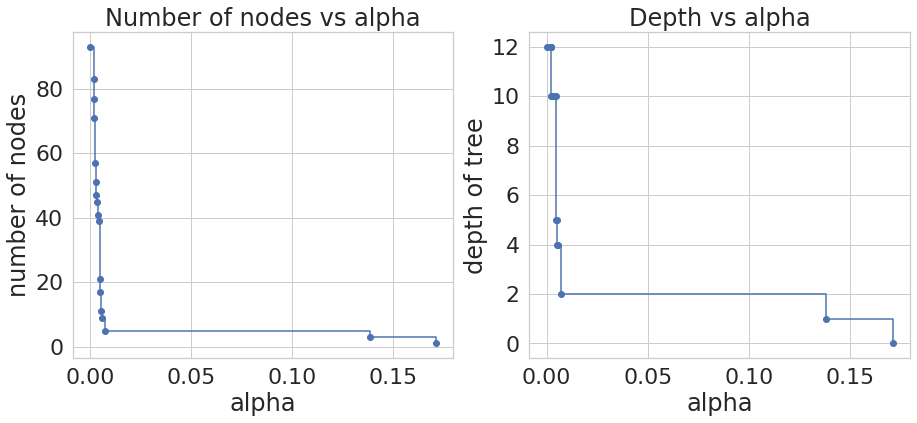

In [25]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("number of nodes")
plt.title("Number of nodes vs alpha")
plt.subplot(1,2,2)

plt.plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("depth of tree")
plt.title("Depth vs alpha")
plt.savefig('in_accuracy.pdf')
plt.show()
#fig.tight_layout()

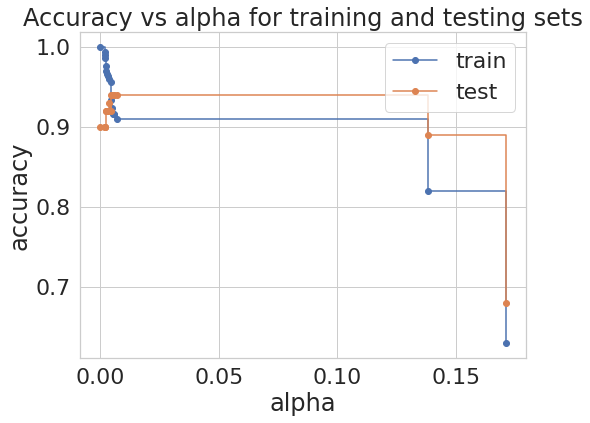

In [26]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

plt.figure(figsize = (8,6))
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs alpha for training and testing sets")
plt.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
plt.legend()
plt.savefig('accuracy.pdf')
plt.show()

# Motorcycle example

In [27]:
motorcycle = pd.read_csv(_DATA_DIR + 'motorcycle.csv')

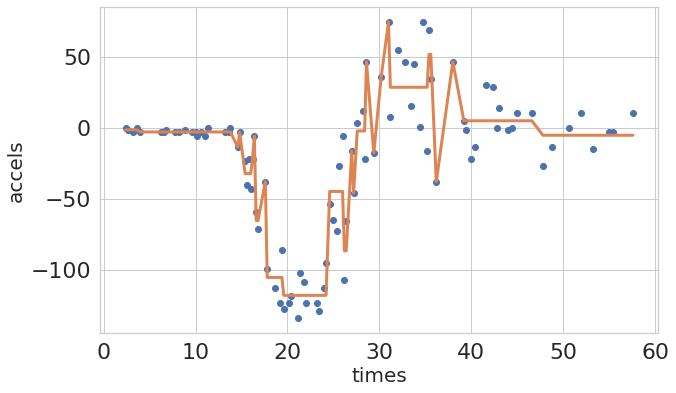

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X = np.array(motorcycle.times).reshape(-1, 1)
y = motorcycle.accel

# Fit a single tree

reg = DecisionTreeRegressor(max_depth = 5).fit(X, y)
y_pred = reg.predict(X)
                    
plt.figure(figsize = (10,6))
ax = plt.gca()
ax.plot(X, y,'o')
ax.plot(X,y_pred,linewidth= 3)
plt.xlabel('times',size =20)
plt.ylabel('accels', size =20)

plt.show()



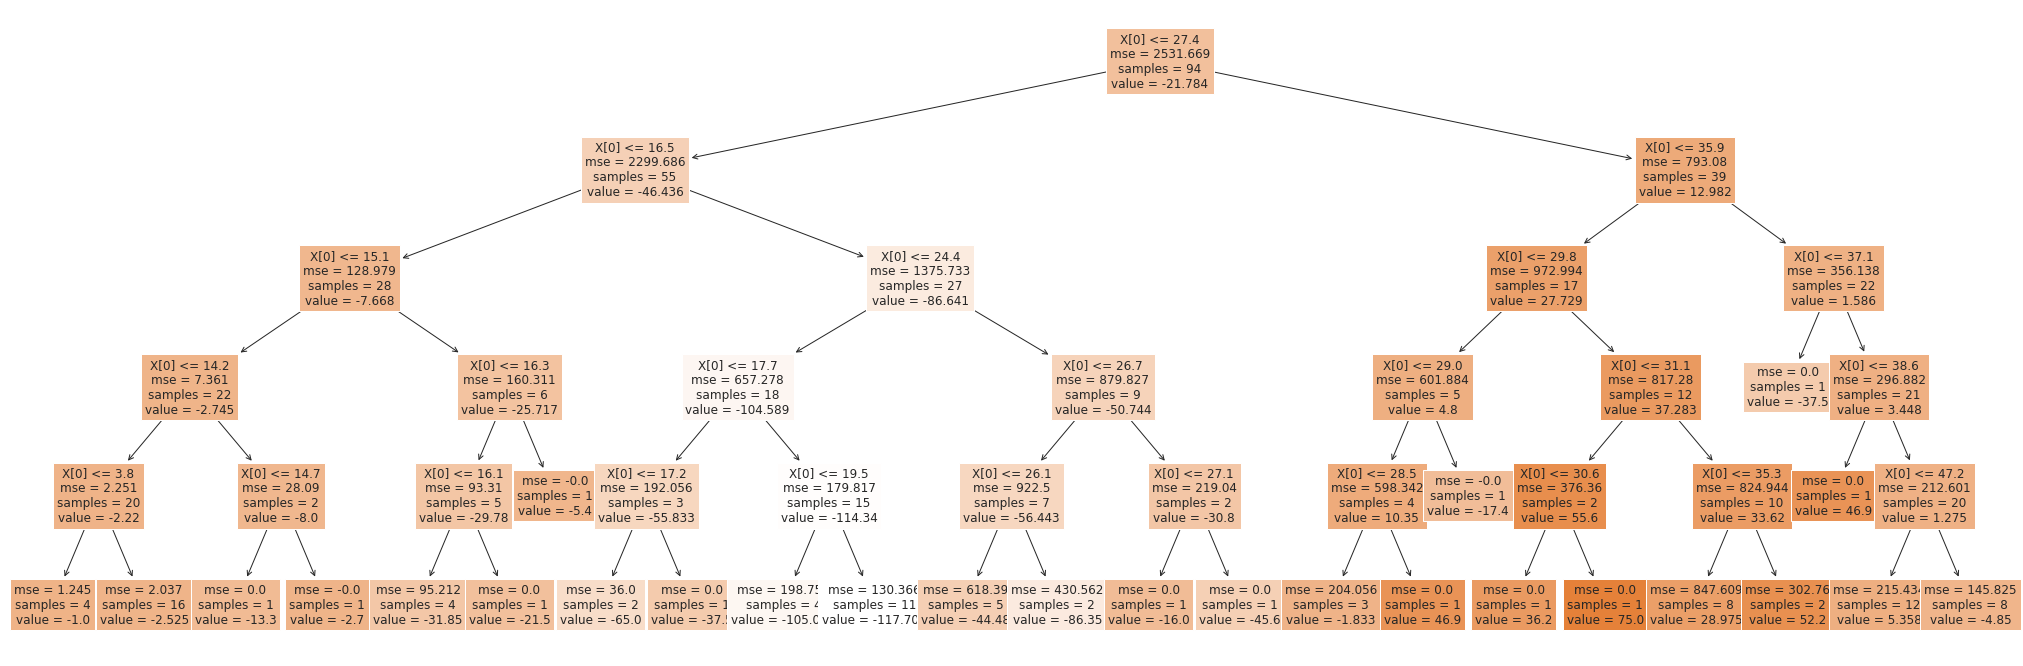

In [29]:
plt.figure(figsize = (36,12))
plot_tree(reg, filled=True, fontsize = 12)

#plt.savefig('rf_tree.pdf')
plt.show()

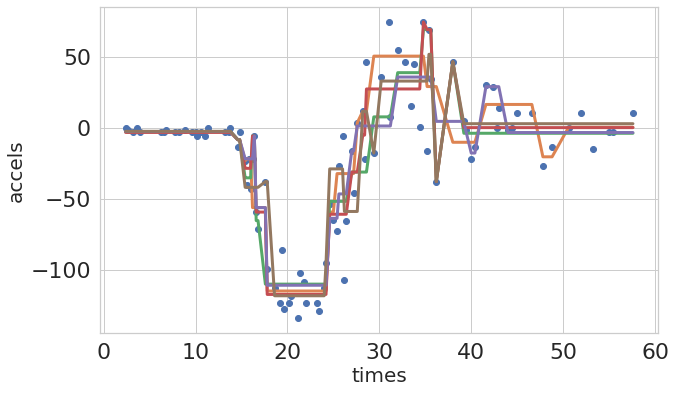

In [30]:
# Samlping
import random

col_ = [f"Simu {i}" for i in range(5)]
RF_result = pd.DataFrame(columns = col_)

plt.figure(figsize = (10,6))
ax = plt.gca()
ax.plot(X, y,'o')
plt.xlabel('times',size =20)
plt.ylabel('accels', size =20)

for i in range(5):

    idx =  random.sample(range(len(X)),60)

    X_sub = X[idx]
    y_sub = y[idx]

    reg = DecisionTreeRegressor(max_depth = 4).fit(X_sub, y_sub)
    y_pred = reg.predict(X)
    
    RF_result.iloc[:,i] = y_pred

    ax.plot(X,y_pred, linewidth = 3)

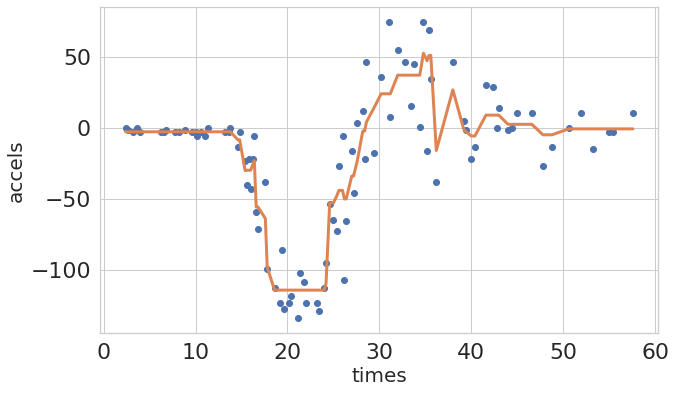

In [31]:
# Average

plt.figure(figsize = (10,6))
ax = plt.gca()
plt.xlabel('times',size =20)
plt.ylabel('accels', size =20)
ax.plot(X, y,'o')
ax.plot(X,RF_result.mean(axis = 1), linewidth = 3)

plt.show()

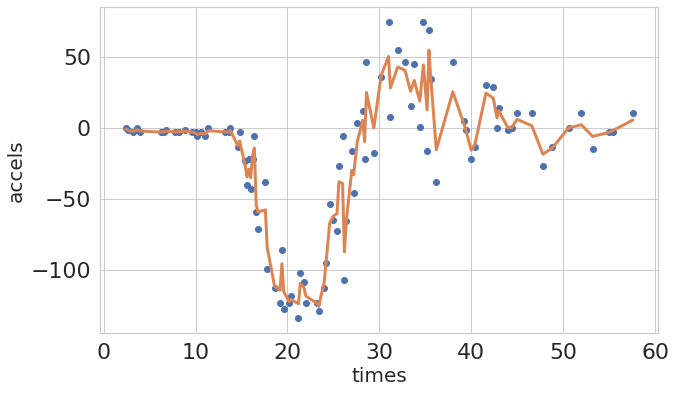

In [32]:
# Random Forest with package
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor().fit(X, y)
y_pred = reg.predict(X)
                    
plt.figure(figsize = (10,6))
ax = plt.gca()
ax.plot(X, y,'o')
ax.plot(X,y_pred,linewidth= 3)
plt.xlabel('times',size =20)
plt.ylabel('accels', size =20)
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error
tree_num = range(10,300)

MSE = []

for i in tree_num:
    reg = RandomForestRegressor(n_estimators = i).fit(X, y)
    y_pred = reg.predict(X)
    
    MSE.append(mean_squared_error(y,y_pred))

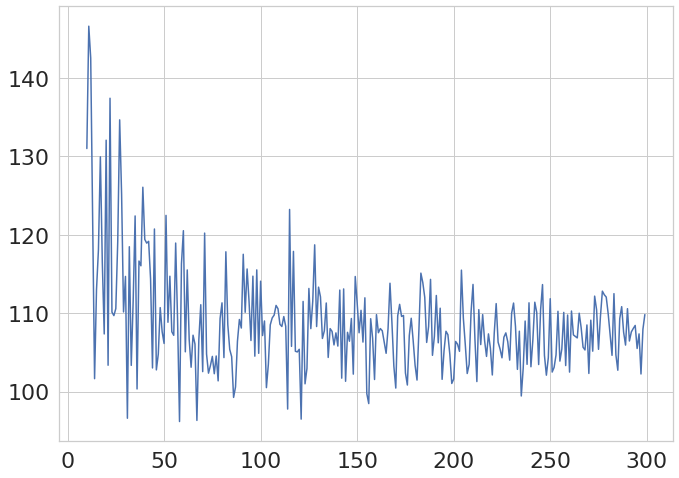

In [34]:
plt.plot(range(10,300),MSE)

# CA housing

In [35]:
CAhousing = pd.read_csv(_DATA_DIR+'CAhousing.csv')

In [36]:
CAhousing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [37]:
CAhousing['AveBedrms'] = CAhousing.totalBedrooms / CAhousing.households
CAhousing['AveRooms'] = CAhousing.totalRooms / CAhousing.households
CAhousing['AveOccupancy'] = CAhousing.population / CAhousing.households
CAhousing['logMedVal'] = CAhousing['medianHouseValue'].apply(lambda x: np.log(x))
CAhousing = CAhousing.drop(columns = ['totalRooms','totalBedrooms','medianHouseValue'])

In [38]:
X = CAhousing.drop(columns='logMedVal')
y = CAhousing['logMedVal']

## decision tree

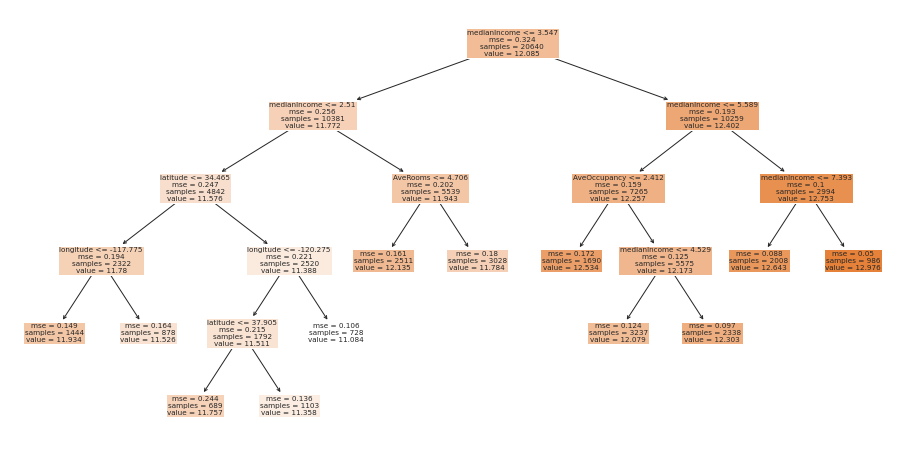

In [39]:
CART = tree.DecisionTreeRegressor(max_leaf_nodes=12).fit(X, y)
text_representation = tree.export_text(CART,feature_names=list(X.columns))
plt.figure(figsize = (16,8))
# tree
plot_tree(CART, filled=True,feature_names=list(X.columns))
plt.show()

## random forest

In [40]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

RF=RandomForestRegressor(n_estimators=100).fit(X, y)

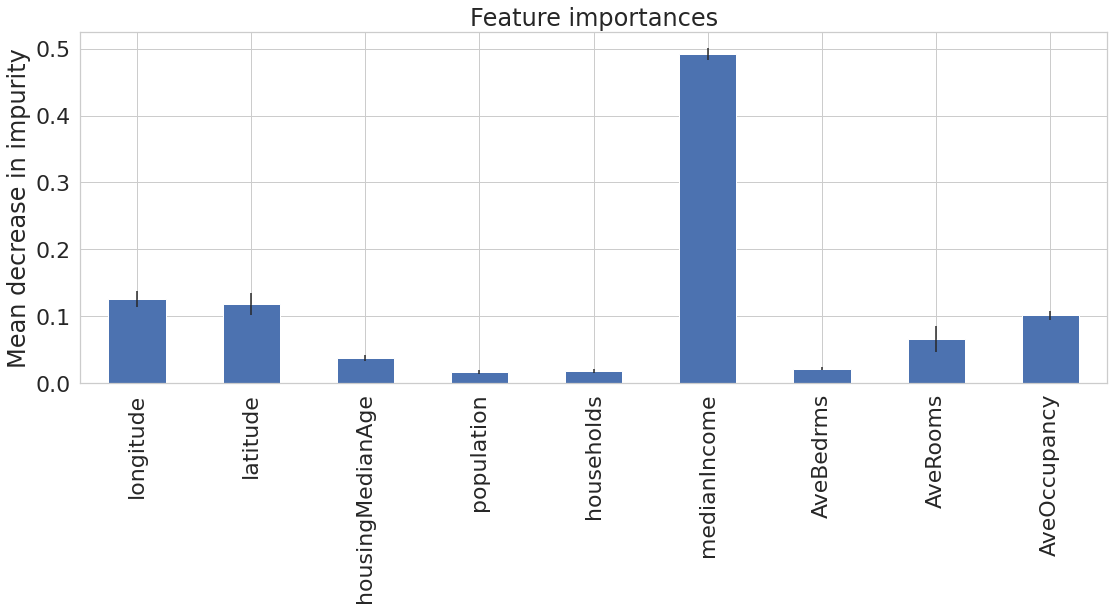

In [41]:
feature_names = X.columns
importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)


fig, ax = plt.subplots(figsize =(16, 9))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


## LASSO

In [42]:
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler

In [43]:
Xscaler = StandardScaler().fit(X) 

X_scaled = Xscaler.transform(X)


In [44]:
model = LassoCV(cv=5, random_state = 0, max_iter=10000)

model.fit(X_scaled, y)

# Show best value of penalization chosen by CV
alpha_ = model.alpha_
print(alpha_)

# refit
lasso = Lasso(max_iter=10000)
LASSO = lasso.set_params(alpha=alpha_).fit(X_scaled, y)

0.0005311650443186415


In [45]:
pred_CART = CART.predict(X)
pred_RF = RF.predict(X)
pred_LASSO = LASSO.predict(X_scaled)

resid_CART = pred_CART-y
resid_RF = pred_RF-y
resid_LASSO = pred_LASSO-y

## visualization

In [46]:
def residmap(y):
    
    y = pd.DataFrame(y)
    
    df = pd.concat([y,CAhousing[['longitude','latitude']]],axis=1)
    df.columns = ['resid','longitude','latitude']
    
    df.loc[df['resid']<=-2,'residuals'] = -2
    df.loc[((df['resid']>-2) & (df['resid']<=2)),'residuals'] = 0
    df.loc[df['resid']>2,'residuals'] = 2

    geo_df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

    ax = usa.boundary.plot(edgecolor = 'black', figsize= (16,9))

    geo_df[geo_df.residuals == -2].plot(ax=ax, color = 'red',label = '-2',markersize=50)
    geo_df[geo_df.residuals == 0].plot(ax=ax, color = '#fffaea',label = '0',markersize=10)
    geo_df[geo_df.residuals == 2].plot(ax=ax, color = 'blue',label = '2',markersize=50)

    plt.legend()
    plt.title('residuals')
    plt.axis('off')
    return plt

In [47]:
def predmap(y):
    
    y = pd.DataFrame(y)
    
    df = pd.concat([y,CAhousing[['longitude','latitude']]],axis=1)
    df.columns = ['pred','longitude','latitude']
    
    df.loc[df['pred']<=np.log(20000),'prediction'] = 20
    df.loc[((df['pred']>np.log(20000)) & (df['pred']<=np.log(100000))),'prediction'] = 100
    df.loc[((df['pred']>np.log(100000)) & (df['pred']<=np.log(400000))),'prediction'] = 400
    df.loc[((df['pred']>np.log(400000)) & (df['pred']<=np.log(1000000))),'prediction'] = 1000

    geo_df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

    ax = usa.boundary.plot(edgecolor = 'black', figsize= (16,9))

    geo_df[geo_df.prediction == 20].plot(ax=ax, color = '#fffaea',label = '20k',markersize=4)
    geo_df[geo_df.prediction == 100].plot(ax=ax, color = 'yellow',label = '100k',markersize=4)
    geo_df[geo_df.prediction == 400].plot(ax=ax, color = 'orange',label = '400k',markersize=4)
    geo_df[geo_df.prediction == 1000].plot(ax=ax, color = 'red',label = '1 mil',markersize=4)

    plt.legend()
    plt.title('prediction')
    plt.axis('off')
    return plt

In [48]:
import geopandas as gpd
# Get the USA map
usa_map = gpd.read_file("%s/cb_2018_us_state_20m.shp"%(_DATA_DIR))
#usa = usa_map[~usa_map.NAME.isin(['Alaska','Hawaii','Puerto Rico'])]
usa = usa_map[usa_map.index.isin([12])] #CA

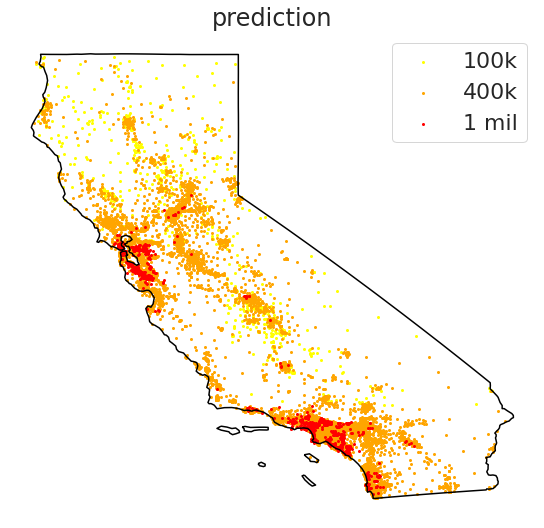

In [49]:
pred_CART_plot = predmap(pred_CART)
pred_CART_plot.savefig('pred_CART_plot.pdf')

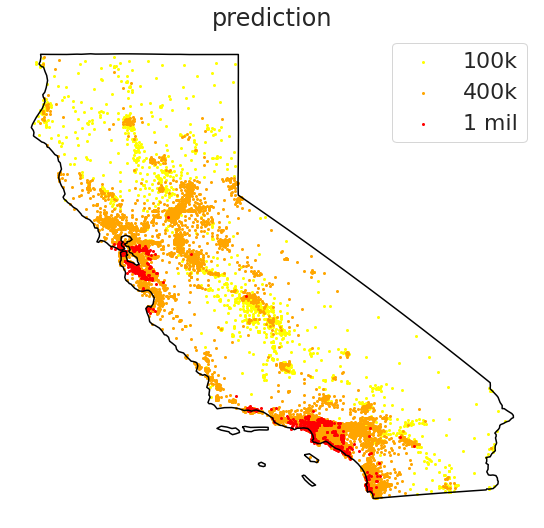

In [50]:
pred_RF_plot = predmap(pred_RF)
pred_RF_plot.savefig('pred_RF_plot.pdf')

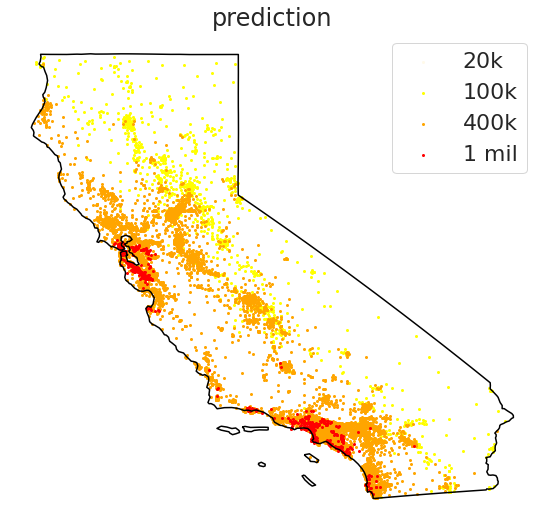

In [51]:
pred_LASSO_plot = predmap(pred_LASSO)
pred_LASSO_plot.savefig('pred_LASSO_plot.pdf')

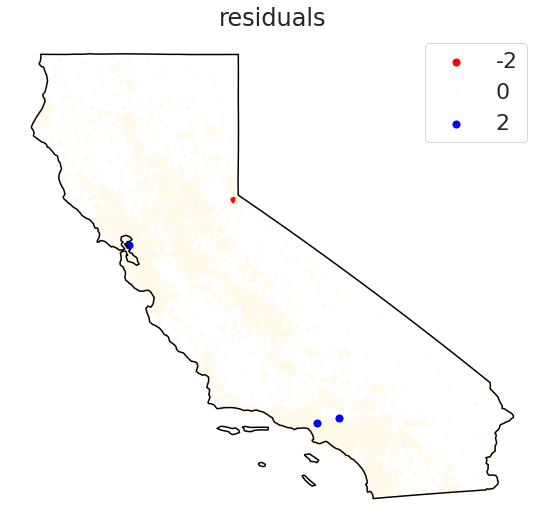

In [52]:
resid_CART_plot = residmap(resid_CART)
resid_CART_plot.savefig('resid_CART_plot.pdf')

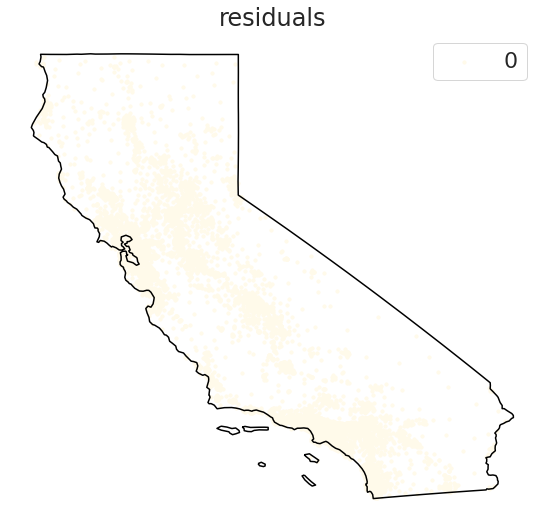

In [53]:
resid_RF_plot = residmap(resid_RF)
resid_RF_plot.savefig('resid_RF_plot.pdf')

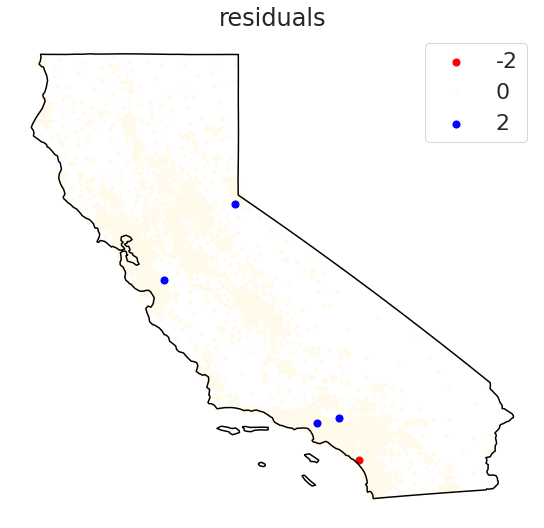

In [54]:
resid_LASSO_plot = residmap(resid_LASSO)
resid_LASSO_plot.savefig('resid_LASSO_plot.pdf')

## OOS

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
# setup the experimente
n = X.shape[0]  # the number of observations
np.random.seed(0)
CAhousing = CAhousing.sample(frac=1).reset_index(drop=True)
K = 5  # the number of `folds'
# create a vector of fold memberships
tmp = np.repeat(np.array(range(1,K+1)), np.ceil(n/K))[0:n]

# foldid = pd.DataFrame(sample(list(tmp), n)) # cross-validation
foldid = pd.DataFrame(tmp)
foldid.columns= ['foldid']

In [56]:
def deviance(y, pred, family):
    if family == 'gaussian':
        return np.sum((y - pred)**2)
    if family == 'binomial':
        return -2 * np.sum(y * np.log(pred) + (1-y) * np.log(1-pred))

In [57]:
# CART
np.random.seed(0)
r_2_CART = []
MSE_CART = []

for k in range(K):
    train_idx = foldid[foldid.foldid != (k+1)].index.tolist()
    valid_idx = foldid[foldid.foldid == (k+1)].index.tolist()
    train = CAhousing.iloc[train_idx,:]
    valid = CAhousing.iloc[valid_idx,:]
    X_train = train.drop(columns = 'logMedVal')
    y_train = train.logMedVal
    X_valid = valid.drop(columns = 'logMedVal')
    y_valid = valid.logMedVal
    scores = []
    np.random.seed(0)
    for i in range(10,200,5):
        clf = tree.DecisionTreeRegressor(max_leaf_nodes=i)
        score = cross_val_score(clf, X_train, y=y_train, cv=5)
        scores.append(score.mean())
    Ns = np.arange(10,200,5)
    N = Ns[np.argmax(scores)]
    #plt.figure(figsize=(8,6))
    #plt.plot(Ns,scores)
    #plt.show()
    CART = tree.DecisionTreeRegressor(max_leaf_nodes=N).fit(X_train, y_train)
    y_pred = CART.predict(X_valid)
    dev0 = deviance(y_valid,y_valid.mean(), family = 'gaussian')
    dev = deviance(y_valid, y_pred, family = 'gaussian')
    r_2_CART.append(1-dev/dev0)
    MSE_CART.append(mean_squared_error(y_valid,y_pred))

In [58]:
# RF
r_2_RF = []
MSE_RF = []

for k in range(K):
    train_idx = foldid[foldid.foldid != (k+1)].index.tolist()
    valid_idx = foldid[foldid.foldid == (k+1)].index.tolist()
    train = CAhousing.iloc[train_idx,:]
    valid = CAhousing.iloc[valid_idx,:]
    X_train = train.drop(columns = 'logMedVal')
    y_train = train.logMedVal
    X_valid = valid.drop(columns = 'logMedVal')
    y_valid = valid.logMedVal


    RF = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
    y_pred = RF.predict(X_valid)


    dev0 = deviance(y_valid,y_valid.mean(), family = 'gaussian')
    dev = deviance(y_valid, y_pred, family = 'gaussian')

    r_2_RF.append(1-dev/dev0)
    MSE_RF.append(mean_squared_error(y_valid,y_pred))

In [59]:
# LASSO
r_2_LASSO = []
MSE_LASSO = []

for k in range(K):
    train_idx = foldid[foldid.foldid != (k+1)].index.tolist()
    valid_idx = foldid[foldid.foldid == (k+1)].index.tolist()
    train = CAhousing.iloc[train_idx,:]
    valid = CAhousing.iloc[valid_idx,:]
    X_train = train.drop(columns = 'logMedVal')
    y_train = train.logMedVal
    X_valid = valid.drop(columns = 'logMedVal')
    y_valid = valid.logMedVal


    model = LassoCV(cv=5, random_state = 0, max_iter=10000).fit(X_train, y_train)
    alpha_ = model.alpha_
    
    lasso = Lasso(max_iter=10000)
    LASSO = lasso.set_params(alpha=alpha_).fit(X_train, y_train)
    y_pred = LASSO.predict(X_valid)


    dev0 = deviance(y_valid,y_valid.mean(), family = 'gaussian')
    dev = deviance(y_valid, y_pred, family = 'gaussian')

    r_2_LASSO.append(1-dev/dev0)
    MSE_LASSO.append(mean_squared_error(y_valid,y_pred))

In [60]:
OOS_R2 = pd.DataFrame({'CART':r_2_CART,'RF': r_2_RF, 'LASSO': r_2_LASSO})
OOS_R2

,CART,RF,LASSO
0,0.718786,0.826761,0.624136
1,0.721894,0.824829,0.637372
2,0.718422,0.842152,0.625790
3,0.749150,0.838898,0.636389
4,0.744747,0.828918,0.628448


In [61]:
OOS_MSE = pd.DataFrame({'CART':MSE_CART,'RF': MSE_RF, 'LASSO': MSE_LASSO})
OOS_MSE

,CART,RF,LASSO
0,0.089909,0.055387,0.120169
1,0.092318,0.058148,0.120375
2,0.092877,0.052065,0.123431
3,0.080861,0.051931,0.117209
4,0.080544,0.053984,0.117242


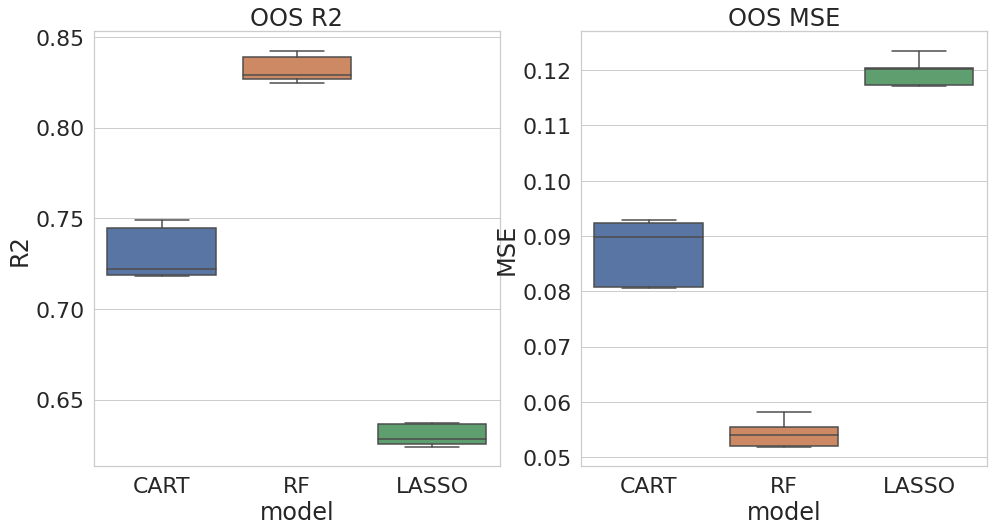

In [62]:
plt.figure(figsize = (16,8))

plt.subplot(1, 2, 1)

sns.boxplot(data=OOS_R2 )
plt.xlabel('model')
plt.ylabel('R2')
plt.title('OOS R2')

plt.subplot(1, 2, 2)

sns.boxplot(data=OOS_MSE )
plt.xlabel('model')
plt.ylabel('MSE')
plt.title('OOS MSE')
plt.savefig('oos.pdf')